#**Selección y limpieza de datos**
##Juan Manuel González Ascencio
##Diana Gonzalez Munguia
##Sebastián Romero Velasco
##Jaime Ernesto Aguilar Trejo

## Instruccciones

##Eliminar las columnas o variables no relevantes.


##Restablecer los índices si es necesario con identificadores adecuados.

In [2]:
import numpy as np
import pandas as pd

lv = pd.read_excel('Solo_liverpool.xlsx')


columnas_no_relevantes = [
    'Shipper Phone', 'Cons Phone', 'Billto Phone',
    'Carrier Rep', 'Carrier Pay', 'Order Status', 'Order By Cmp ID',
    'Order By Company', 'Order By City, State', 'Bill To Cmp ID',
    'Bill To Company', 'Bill To City, State', 'Order Start Date',
    'Order Completion Date', 'VENDEDOR', 'SUCURSAL', 'Origin Port', 'Dest Port',
    '204 Status', '204 Date'
]


lv.drop(columns=columnas_no_relevantes, inplace=True)


print(lv.head())





     Order # Invoice Status Shipper Cmp ID          Shipper Company  \
0  1346469.0            XIN       CDTLIVTL  BOD LIVERPOOL TULTITLAN   
1  1346470.0            XIN       CDTLIVTL  BOD LIVERPOOL TULTITLAN   
2  1346485.0            XIN       CDTLIVTL  BOD LIVERPOOL TULTITLAN   
3  1347960.0            PPD         ENCMON  ENCO GNV BERNARDO REYES   
4  1346187.0            AVL       PLANTECA           PLANTA TECAMAC   

   Shipper City Shipper State Consignee Cmp ID  \
0  TULTITLAN,EM            EM          LIVPLAN   
1  TULTITLAN,EM            EM          LIVPLAN   
2  TULTITLAN,EM            EM          LIVPLAN   
3  MONTERREY,NX            NX           ENCMON   
4    TECAMAC,EM            EM         BODIZT02   

                                   Consignee Company Consignee City  \
0  PLAN LIVERPOOL (PLATAFORMA LOGÍSTICA ARCO NORT...   JILOTEPEC,EM   
1  PLAN LIVERPOOL (PLATAFORMA LOGÍSTICA ARCO NORT...   JILOTEPEC,EM   
2  PLAN LIVERPOOL (PLATAFORMA LOGÍSTICA ARCO NORT...   JILO

Al procesar el DataFrame DF_LV, decidimos eliminar una serie de columnas consideradas no relevantes para los objetivos específicos del proyecto, que se centra en mejorar la administración del telepeaje en TDR .

Eliminamos columnas que tenían información que se repetía como 'Origin Region1' y 'Order Status', porque todos los valores eran iguales y eso no nos ayudaba a diferenciar entre los registros. También quitamos columnas como '204 Date', que faltaba toda la información y no aportaba al análisis que queríamos realizar. Nuestro objetivo era hacer que el conjunto de datos fuera más fácil de manejar y centrarnos en la información que realmente podría ayudarnos a entender cómo mejorar la eficiencia operativa. Después de eliminar estas columnas y asegurarnos de que cada fila tuviera un número de índice único y en orden, revisamos las primeras filas del conjunto de datos ajustado para asegurarnos de que todo estuviera listo para un análisis más detallado.

# Restablecer los índices si es necesario con identificadores adecuados.

In [3]:
lv.reset_index(drop=True, inplace=True)


print(lv.head())

     Order # Invoice Status Shipper Cmp ID          Shipper Company  \
0  1346469.0            XIN       CDTLIVTL  BOD LIVERPOOL TULTITLAN   
1  1346470.0            XIN       CDTLIVTL  BOD LIVERPOOL TULTITLAN   
2  1346485.0            XIN       CDTLIVTL  BOD LIVERPOOL TULTITLAN   
3  1347960.0            PPD         ENCMON  ENCO GNV BERNARDO REYES   
4  1346187.0            AVL       PLANTECA           PLANTA TECAMAC   

   Shipper City Shipper State Consignee Cmp ID  \
0  TULTITLAN,EM            EM          LIVPLAN   
1  TULTITLAN,EM            EM          LIVPLAN   
2  TULTITLAN,EM            EM          LIVPLAN   
3  MONTERREY,NX            NX           ENCMON   
4    TECAMAC,EM            EM         BODIZT02   

                                   Consignee Company Consignee City  \
0  PLAN LIVERPOOL (PLATAFORMA LOGÍSTICA ARCO NORT...   JILOTEPEC,EM   
1  PLAN LIVERPOOL (PLATAFORMA LOGÍSTICA ARCO NORT...   JILOTEPEC,EM   
2  PLAN LIVERPOOL (PLATAFORMA LOGÍSTICA ARCO NORT...   JILO

##Seleccionar o filtrar los registros u observaciones de interés para operar dataframes de menor complejidad.

Para el paso 3, después de una revisión cuidadosa, decidimos no realizar ningún filtrado adicional basado en criterios específicos como fechas u otros parámetros, esto ya que el conjunto de datos que estamos manejando ya está preseleccionado para incluir únicamente las operaciones relacionadas con Liverpool para el período de tiempo asignado a nuestro equipo. Dado que este conjunto ya viene con una definición de fechas, y considerando que nuestro análisis se enfoca en todas las operaciones a Liverpool, no es necesario aplicar filtros adicionales.

##Identificar valores faltantes y eliminarlos o imputarlos según la naturaleza de la omisión. Justificar cada caso.

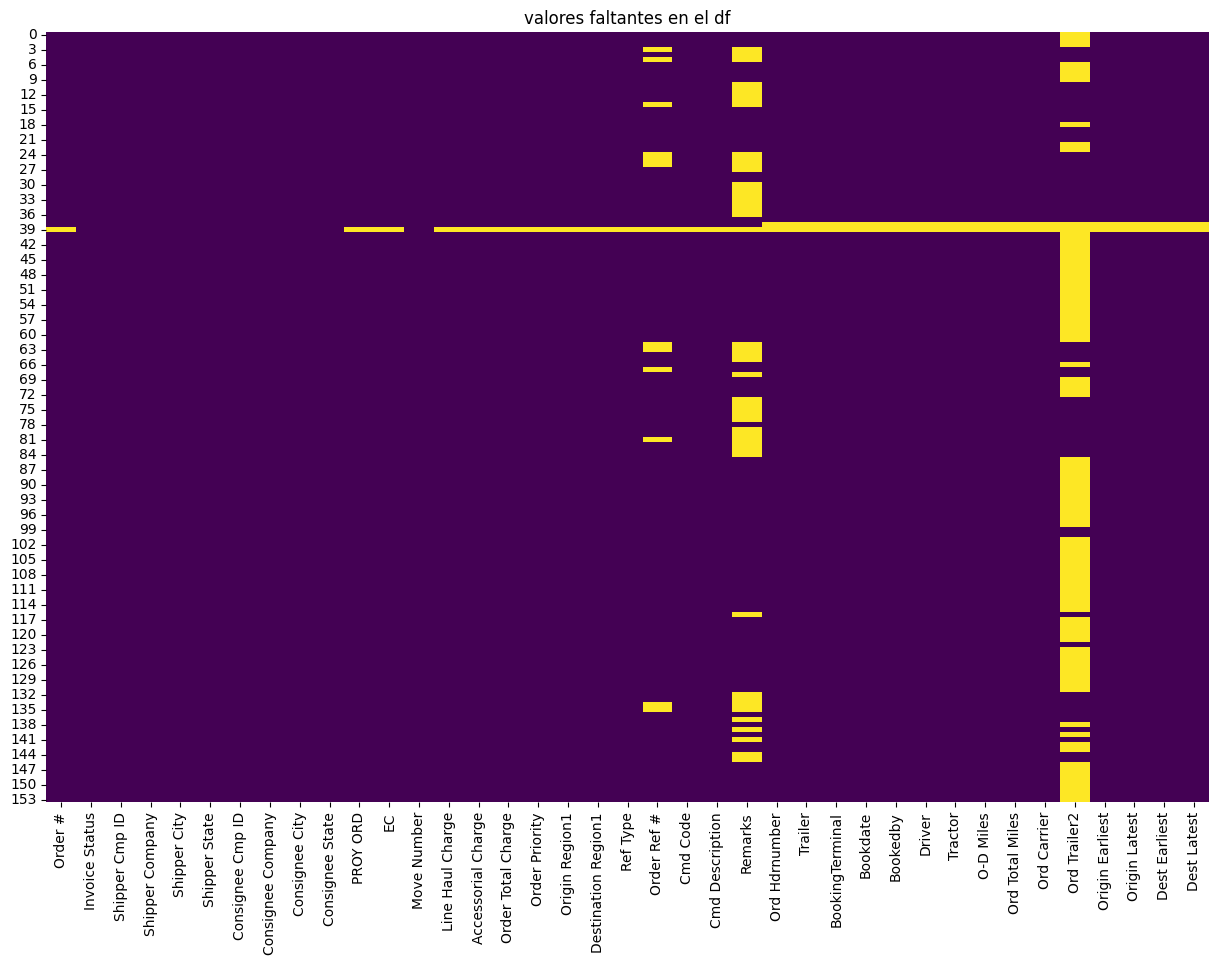

Order #                 1
Invoice Status          0
Shipper Cmp ID          0
Shipper Company         0
Shipper City            0
Shipper State           0
Consignee Cmp ID        0
Consignee Company       0
Consignee City          0
Consignee State         0
PROY ORD                1
EC                      1
Move Number             0
Line Haul Charge        1
Accessorial Charge      1
Order Total Charge      1
Order Priority          1
Origin Region1          1
Destination Region1     1
Ref Type                1
Order Ref #            13
Cmd Code                1
Cmd Description         1
Remarks                46
Ord Hdrnumber           2
Trailer                 2
BookingTerminal         2
Bookdate                2
Bookedby                2
Driver                  2
Tractor                 2
O-D Miles               2
Ord Total Miles         2
Ord Carrier             2
Ord Trailer2           94
Origin Earliest         2
Origin Latest           2
Dest Earliest           2
Dest Latest 

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns


plt.figure(figsize=(15, 10))
sns.heatmap(lv.isnull(), cbar=False, cmap='viridis')
plt.title('valores faltantes en el df')
plt.show()


valores_faltantes = lv.isnull().sum()
print(valores_faltantes)

Para los valores faltantes en el conjunto de datos de Liverpool, es crucial reconocer la singularidad de cada entrada. Dado que cada número de orden representa una transacción distinta y los detalles del tráiler varían significativamente de una entrega a otra, la imputación de estos valores faltantes mediante métodos estadísticos generales, como la media o la mediana, podría distorsionar el análisis, introduciendo inexactitudes en el conjunto de datos. Esta inexactitud no solo afectaría la validez de cualquier conclusión sino que también podría conducir a decisiones operativas y logísticas erróneas. Por lo tanto, hemos optado por mantener la integridad y precisión de los datos evitando imputaciones generalizadas o eliminaciones de columnas enteras para estos elementos críticos.

##Detectar valores atípicos para su posterior transformación.

In [8]:
#mostramos los registros con valores nulos de la columna Order

lv[lv['Order #'].isnull()]

# borrar el registro nulo 

lv.dropna(subset=['Order #'], inplace=True)



In [9]:

lv[lv['Order #'].isnull()]


,Order #,Invoice Status,Shipper Cmp ID,Shipper Company,Shipper City,Shipper State,Consignee Cmp ID,Consignee Company,Consignee City,Consignee State,...,Driver,Tractor,O-D Miles,Ord Total Miles,Ord Carrier,Ord Trailer2,Origin Earliest,Origin Latest,Dest Earliest,Dest Latest


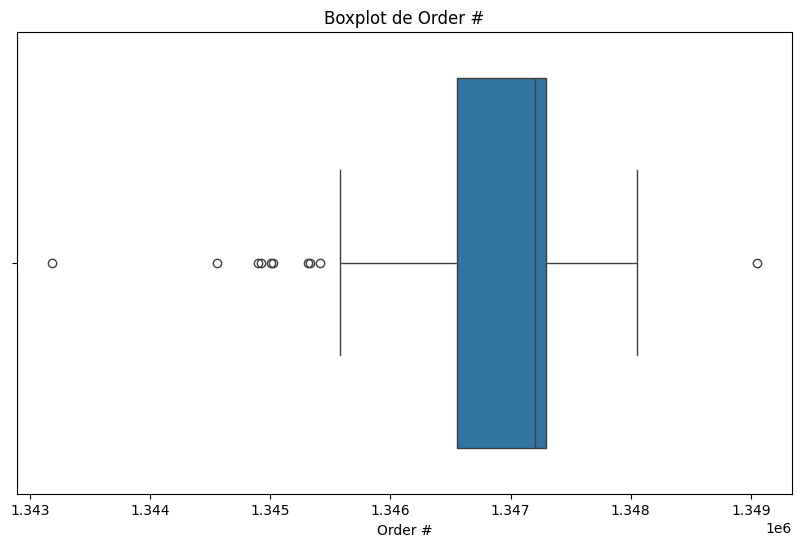

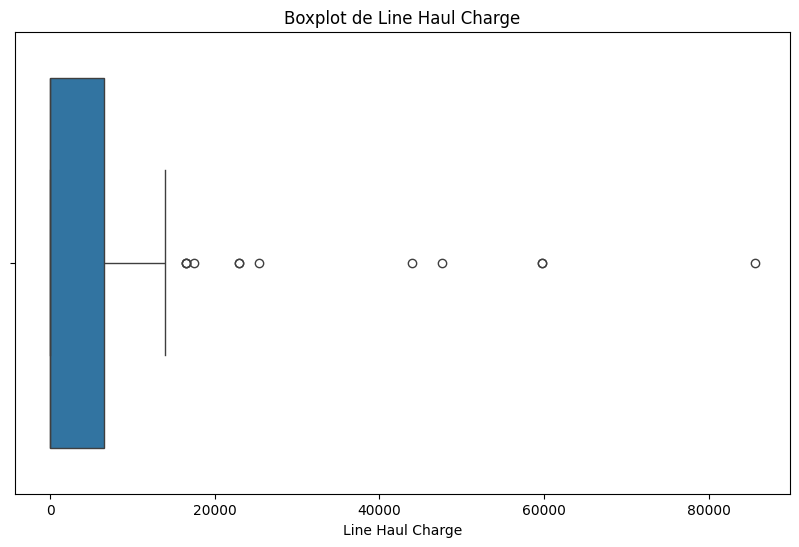

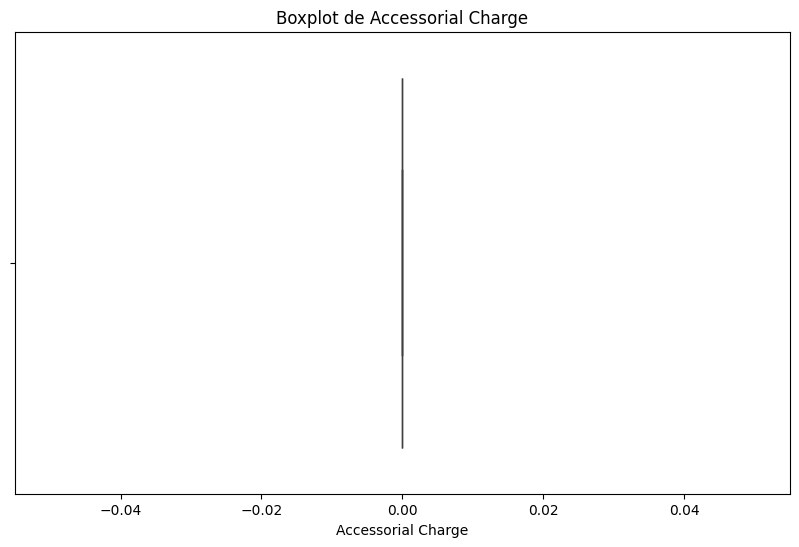

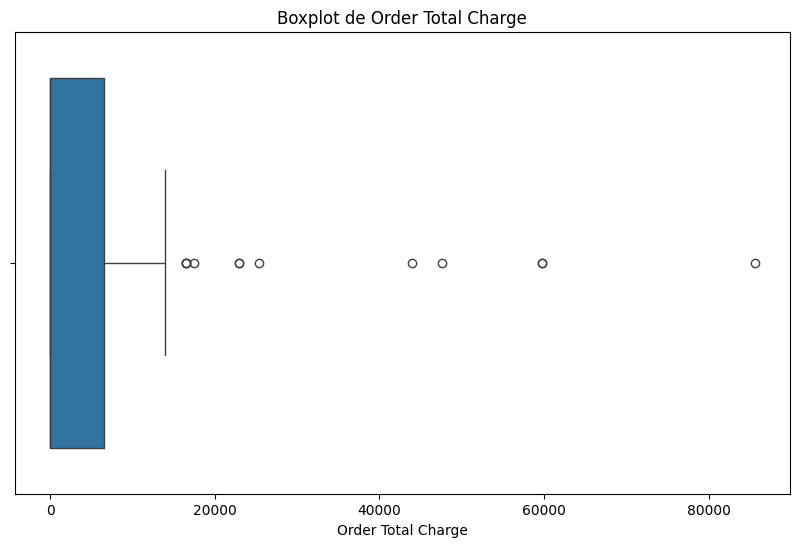

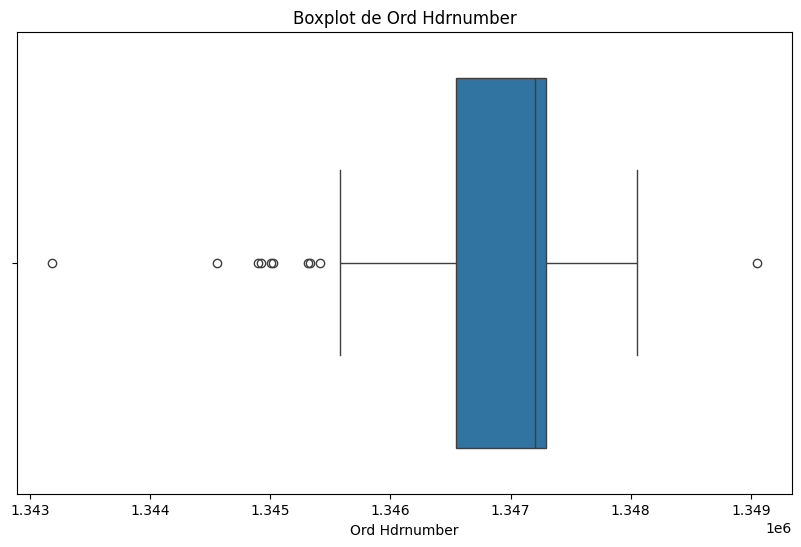

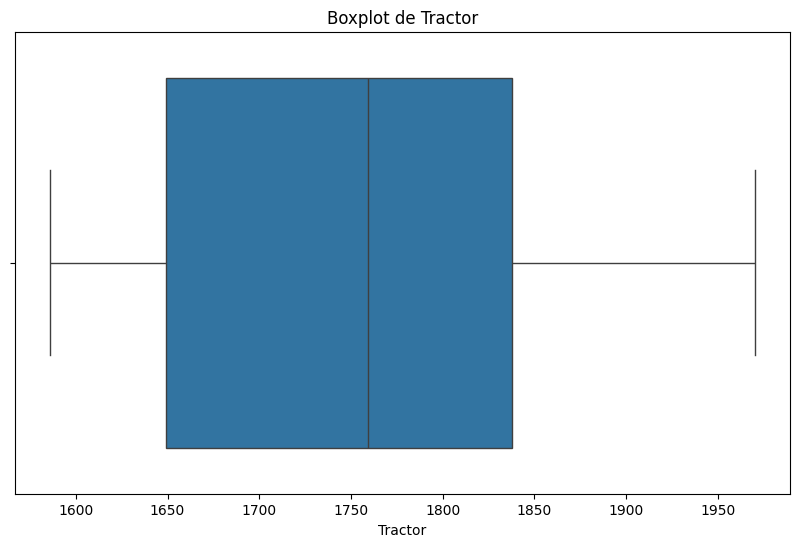

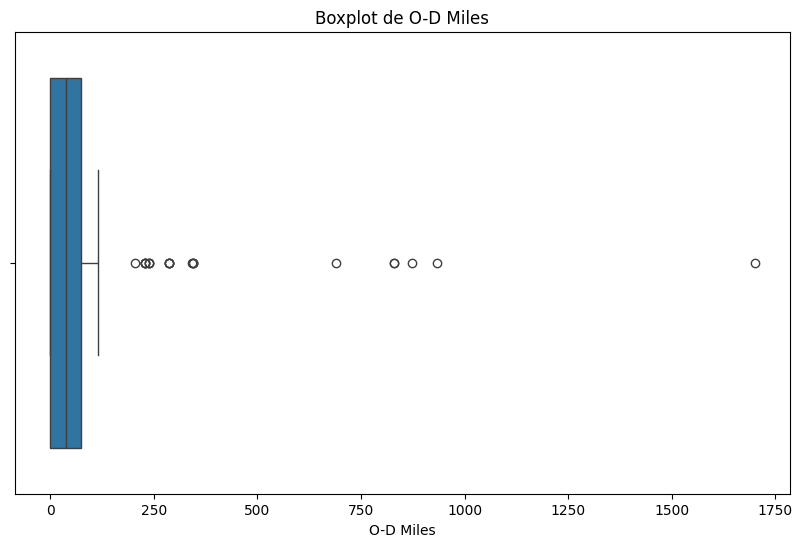

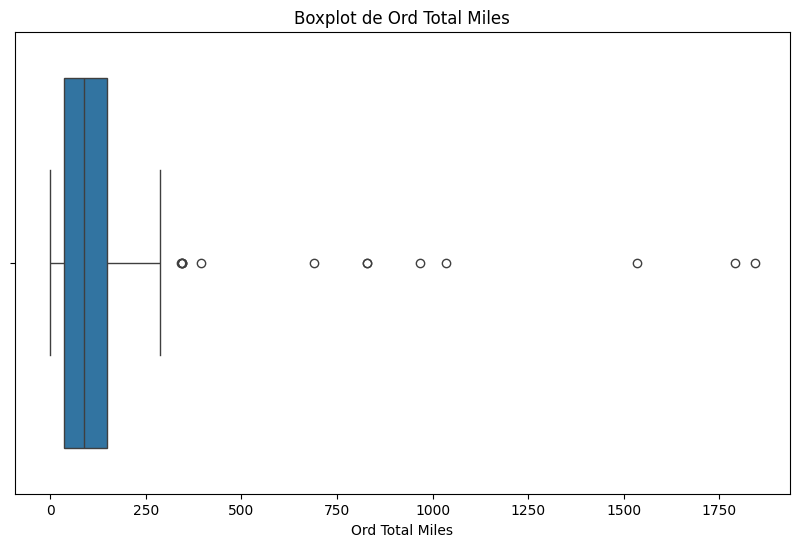

In [ ]:
columnas_numericas = lv.select_dtypes(include=['float64', 'int64']).columns

for columna in columnas_numericas:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=lv[columna])
    plt.title(f'Boxplot de {columna}')
    plt.show()

Después de ver los boxplots para las columnas numéricas en nuestros datos decidimos no quitar ni cambiar los valores atípicos que encontramos. Estos valores atípicos están en columnas importantes como los costos de transporte y las millas recorridas, que nos dicen mucho sobre lo que cuesta cada entrega y cuán lejos van. Estos números pueden variar mucho porque algunas entregas son simplemente más caras o más largas que otras. Si empezamos a quitar o cambiar estos datos, podríamos perder información valiosa que nos ayuda a entender mejor cómo funciona todo. Además, esos valores atípicos pueden señalar situaciones únicas que valdría la pena checar en un futuro. Queremos mantener nuestros datos lo más completos y reales posible para asegurarnos de que cuando analicemos todo, estemos viendo el cuadro completo.

##Eliminar registros duplicados.

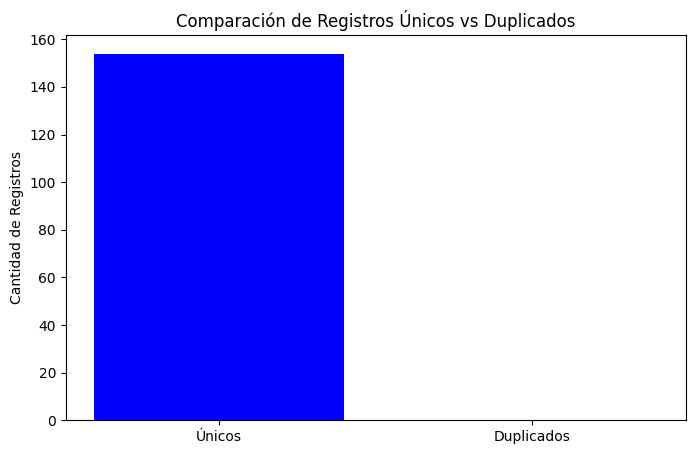

In [ ]:
duplicados = lv.duplicated(keep=False)
cantidad_duplicados = duplicados.sum()
cantidad_unicos = len(lv) - cantidad_duplicados


categorias = ['Únicos', 'Duplicados']
cantidades = [cantidad_unicos, cantidad_duplicados]

plt.figure(figsize=(8, 5))
plt.bar(categorias, cantidades, color=['blue', 'orange'])
plt.title('Comparación de Registros Únicos vs Duplicados')
plt.ylabel('Cantidad de Registros')
plt.show()

Tras aplicar el proceso de identificación de registros duplicados a nuestro conjunto de datos de Liverpool, hemos concluido que no existen duplicados.